<a href="https://colab.research.google.com/github/aisa0/Reconstruccion_de_senales_de_audio/blob/main/main_principal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paso 1: Importar archivos de github y copiarlos en /content/

In [1]:
!git clone https://github.com/aisa0/Reconstruccion_de_senales_de_audio.git

Cloning into 'Reconstruccion_de_senales_de_audio'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 64 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (64/64), 54.16 MiB | 22.32 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
import shutil

# Definir las rutas de origen y destino
source_dir = '/content/Reconstruccion_de_senales_de_audio'
destination_dir = '/content/'

# Copiar todo el contenido del directorio origen al directorio destino
shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)


'/content/'

# Paso 2: Instalar de librerías para main.py

In [5]:
# Instalar las bibliotecas necesarias para procesamiento y análisis de audio
!pip install librosa soundfile                # Procesamiento de audio y carga de archivos
!pip install deepgram-sdk aiohttp nest_asyncio # Deepgram SDK para transcripción, asyncio para asincronía
!pip install pydub ffmpeg                     # Manipulación de audio, conversión entre formatos y soporte para ffmpeg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.2/129.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=9b647ff9ff2100ec986d9847f1410a110e45ae29a8a8f7ed3eab776908164ddb
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


# Paso 3: Clonar repositorio e instalar librerías para denoiser con Resemble-AI

In [4]:
!git clone https://github.com/resemble-ai/resemble-enhance.git

!pip install resemble-enhance --upgrade --pre

Cloning into 'resemble-enhance'...
remote: Enumerating objects: 147, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 147 (delta 50), reused 38 (delta 32), pack-reused 43 (from 1)
Receiving objects: 100% (147/147), 60.91 KiB | 1.30 MiB/s, done.
Resolving deltas: 100% (54/54), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.

# Paso 4: Ejecutar main.py



*   Se encarga de amplificar las grabaciones de lejos, aplicar el denoiser a todos los audios y crear las transcripciones respectivas.
*   Se puede ejecutar como: `!python /content/main.py` o bien ejecutando la siguiente celda.
* Antes de ejecutarlo es importante agregar su api_key personal en config.py.
* Para crear la api_key lo puede hacer en la siguiente dirección web de Deepgram, luego de registrarse. [Api Key Deepgram](https://console.deepgram.com/signup?jump=keys&_gl=1*1poy3rf*_gcl_au*OTc3ODI3NDIuMTcyNzU0NDQ2Ng..*_ga*NDc4ODcyNDMwLjE3Mjc1NDQ0NjY.*_ga_TYPC1TBCKT*MTczMzA3MjkyNi4yMy4xLjE3MzMwNzMxODkuNjAuMC4w)

In [ ]:
import os
import shutil
import subprocess
import pandas as pd
from pathlib import Path
from amplificador import amplificar_audios
from aplica_denoiser import aplica_denoiser
from creador_transcripciones import transcribir_y_guardar

# Verificar si cada script existe en el directorio actual
def check_scripts():
    scripts = {
        "amplificador": "/content/amplificador.py",
        "aplica_denoiser": "/content/aplica_denoiser.py",
        "creador_transcripciones": "/content/creador_transcripciones.py",
    }
    for name, path in scripts.items():
        if not Path(path).is_file():
            raise FileNotFoundError(f"{path} no encontrado. Asegúrate de que todos los scripts estén en el directorio.")

# Definir una función para ejecutar cada script
def ejecutar_amplificador():
    print("Amplificando audios...")

    # Directorios de entrada y salida
    input_directory = "/content/Grabaciones_de_lejos"
    output_directory = "/content/Grabaciones_amplificadas"

    # Llamada a la función amplificar_audios
    amplificar_audios(input_directory, output_directory)  # Llama a la función
    print("Grabaciones amplificadas exitosamente.")

def copiar_archivos_a_destino(carpeta_origen, carpeta_origen2, carpeta_destino):
    # Crear la carpeta de destino si no existe
    os.makedirs(carpeta_destino, exist_ok=True)

    # Copiar archivos de ambas carpetas de origen a la carpeta de destino
    for carpeta in [carpeta_origen, carpeta_origen2]:
        for archivo in os.listdir(carpeta):
            ruta_archivo_origen = os.path.join(carpeta, archivo)
            ruta_archivo_destino = os.path.join(carpeta_destino, archivo)

            # Verificar que sea un archivo (no una carpeta)
            if os.path.isfile(ruta_archivo_origen):
                shutil.copy(ruta_archivo_origen, ruta_archivo_destino)
        print(f"Todos los archivos de {carpeta} han sido copiados en {carpeta_destino}.")

def aplicar_denoiser():
    print("Aplicando denoiser a las grabaciones...")
    copiar_archivos_a_destino(
        '/content/Grabaciones_de_cerca/',
        '/content/Grabaciones_amplificadas/',
        '/content/Grabaciones_pre_denoiser/'
    )

    # Directorios de entrada y salida
    input_directory = '/content/Grabaciones_pre_denoiser'
    output_directory = '/content/Audio_denoised_ResembleAI_rk4'

    # Llamada a la función procesar_denoise
    aplica_denoiser(input_directory, output_directory)
    print("Denoiser aplicado.")

def crear_transcripciones():
    print("Creando transcripciones y obteniendo parámetros de confiabilidad...")

    # Transcripciones sin denoiser aplicado
    input_directory_without_denoiser = '/content/Grabaciones_pre_denoiser'
    output_directory_without_denoiser = '/content/Transcripciones_sin_denoiser'
    nombre_archivo_csv_without_denoiser = '/content/Parametros_sin_denoiser.csv'

    # Llamada a la función transcribir_y_actualizar_csv
    transcribir_y_guardar(input_directory_without_denoiser, output_directory_without_denoiser, nombre_archivo_csv_without_denoiser)

    # Transcripciones con denoiser aplicado
    input_directory_denoised = '/content/Audio_denoised_ResembleAI_rk4'
    output_directory_denoised = '/content/Transcripciones_con_denoiser_ResembleAI_RK4'
    nombre_archivo_csv_denoised = '/content/Parametros_con_denoiser_ResembleAI_RK4.csv'

    # Llamada a la función transcribir_y_actualizar_csv
    transcribir_y_guardar(input_directory_denoised, output_directory_denoised, nombre_archivo_csv_denoised)
    print("Transcripciones completadas.")

def main():
    try:
        check_scripts()
        ejecutar_amplificador()
        aplicar_denoiser()
        crear_transcripciones()
    except Exception as e:
        print(f"Ocurrió un error: {e}")

if __name__ == "__main__":
    main()

[2024-11-27 21:04:54,972] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2024-11-27 21:05:01.052379: I tensorflow/core/tpu/tpu_api_dlsym_initializer.cc:95] Opening library: /usr/local/lib/python3.10/dist-packages/tensorflow/python/platform/../../libtensorflow_cc.so.2
2024-11-27 21:05:01.052703: I tensorflow/core/tpu/tpu_api_dlsym_initializer.cc:119] Libtpu path is: libtpu.so
2024-11-27 21:05:01.106268: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Amplificando audios...
Archivo amplificado guardado como /content/Grabaciones_amplificadas/Grabacion1_Punto5_TomadaEnPunto7_Isabel_amplificado.mp3
Archivo amplificado guardado como /content/Grabaciones_amplificadas/Grabacion1_Punto4_TomadaEnPunto7_Isabel_

# Paso 5 (Opcional - Recomendado): Guardar en Drive los resultados de main.py

In [ ]:
import os
import shutil
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Función para copiar carpetas a Google Drive
def guardar_en_drive():
    drive_base_dir = "/content/drive/MyDrive/ProyectoElectrico_v6"
    # Definir las carpetas a guardar en Google Drive
    carpetas_a_guardar = [
        "/content/Grabaciones_amplificadas",
        "/content/Grabaciones_pre_denoiser",
        "/content/Audio_denoised_ResembleAI_rk4",
        "/content/Transcripciones_sin_denoiser",
        "/content/Transcripciones_con_denoiser_ResembleAI_RK4",
        "/content/Parametros_sin_denoiser.csv",
        "/content/Parametros_con_denoiser_ResembleAI_RK4.csv",
    ]

    # Crear directorios y copiar los archivos
    for carpeta in carpetas_a_guardar:
        if os.path.exists(carpeta):
            nombre_carpeta = os.path.basename(carpeta)
            destino = os.path.join(drive_base_dir, nombre_carpeta)
            try:
                if os.path.isfile(carpeta):
                    shutil.copy(carpeta, destino)
                else:
                    shutil.copytree(carpeta, destino, dirs_exist_ok=True)
                print(f"{nombre_carpeta} guardado en Google Drive.")
            except Exception as e:
                print(f"Error al guardar {nombre_carpeta}: {e}")
        else:
            print(f"La carpeta {carpeta} no existe.")

# Llamar a la función
guardar_en_drive()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Grabaciones_amplificadas guardado en Google Drive.
Grabaciones_pre_denoiser guardado en Google Drive.
Audio_denoised_ResembleAI_rk4 guardado en Google Drive.
Transcripciones_sin_denoiser guardado en Google Drive.
Transcripciones_con_denoiser_ResembleAI_RK4 guardado en Google Drive.
Parametros_sin_denoiser.csv guardado en Google Drive.
Parametros_con_denoiser_ResembleAI_RK4.csv guardado en Google Drive.


# Paso 6 (Opcional - Recomendado): Importar desde Drive los resultados de main.py

*    Importa los archivos generados por el main.py que previamente fueron guardados en Drive.
*   Es útil en caso de que se acabe la sesión en Colab tener un punto de retorno y así no tener que volver a correr el main.py.
*   Funciona solo si los resultados fueron previamente guardados en Drive.






In [3]:
import os
import shutil
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Función para copiar carpetas desde Google Drive a /content/
def copiar_a_content():
    # Definir la ruta base de Google Drive
    drive_base_dir = "/content/drive/MyDrive/ProyectoElectrico_v6"

    # Definir las carpetas a copiar
    carpetas_a_copiar = [
        "Grabaciones_amplificadas",
        "Grabaciones_pre_denoiser",
        "Audio_denoised_ResembleAI_rk4",
        "Transcripciones_sin_denoiser",
        "Transcripciones_con_denoiser_ResembleAI_RK4",
        "Parametros_sin_denoiser.csv",
        "Parametros_con_denoiser_ResembleAI_RK4.csv",
    ]

    # Crear directorios y copiar los archivos
    for carpeta in carpetas_a_copiar:
        fuente = os.path.join(drive_base_dir, carpeta)
        destino = os.path.join("/content", carpeta)

        if os.path.exists(fuente):
            try:
                if os.path.isfile(fuente):
                    shutil.copy(fuente, destino)
                else:
                    shutil.copytree(fuente, destino, dirs_exist_ok=True)
                print(f"{carpeta} copiado a /content/.")
            except Exception as e:
                print(f"Error al copiar {carpeta}: {e}")
        else:
            print(f"La carpeta o archivo {fuente} no existe.")

# Llamar a la función
copiar_a_content()


Mounted at /content/drive
Grabaciones_amplificadas copiado a /content/.
Grabaciones_pre_denoiser copiado a /content/.
Audio_denoised_ResembleAI_rk4 copiado a /content/.
Transcripciones_sin_denoiser copiado a /content/.
Transcripciones_con_denoiser_ResembleAI_RK4 copiado a /content/.
Parametros_sin_denoiser.csv copiado a /content/.
Parametros_con_denoiser_ResembleAI_RK4.csv copiado a /content/.


# Paso 7: Ejecutar generador_resultados.py

*   Reescribe las transcripciones sin signos de puntuación y todo en minúsculas.
*   Genera los resultados de WER, Speed Rate y Frecuencia Fundamental y los anota en el .csv correspondiente.
*   Muestra en consola el valor del Speed Rate promedio y su varianza.
*   Muestra en consola el porcentaje de aciertos para la identificación de hablante.
*   Si se desea también puede generar el SNR pero hay que descomentarlo primero.





In [6]:
!pip install unidecode                        # Normalización de texto, útil en preprocesamiento
!pip install speechbrain                      # Modelos de deep learning de audio, identificación de hablante

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.8/824.8 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 15.9 MB/s eta 0:00:00


Se puede ejecutar con `!python /content/generador_resultados.py`o bien ejecutando la siguiente celda

In [ ]:
import os
import shutil
import subprocess
import pandas as pd
from pathlib import Path
from preprocesar_transcripciones import preprocess_single_file, preprocess_files
from determinador_WER import calcular_WER, process_wer_files, insertar_columna_wer  # Asegúrate de que estas funciones estén definidas
from identificador_hablante_grabaciones import identificador_hablante
from calculador_SNR import agregar_snr_a_csv  # Asegúrate de que esta función esté definida
from calculadora_speed_rate import actualizar_csv_con_velocidad  # Asegúrate de que esta función esté definida
from calculadora_frecuencia_fundamental import actualizar_csv_con_frecuencia  # Asegúrate de que esta función esté definida

# Verificar si cada script existe en el directorio actual

def check_scripts():
    scripts = {
        "wer.py": "/content/wer.py",
        "preprocesar_transcripciones": "/content/preprocesar_transcripciones.py",
        "determinador_WER": "/content/determinador_WER.py",
        "calculador_SNR": "/content/calculador_SNR.py",
        "calculadora_speed_rate": "/content/calculadora_speed_rate.py",
        "calculadora_frecuencia_fundamental": "/content/calculadora_frecuencia_fundamental.py",
    }
    for name, path in scripts.items():
        if not Path(path).is_file():
            raise FileNotFoundError(f"{path} no encontrado. Asegúrate de que todos los scripts estén en el directorio.")

def reescribir_transcripciones():
    print("Preprocesando las transcripciones...")

    # Preprocesar texto_referencia.txt
    input_directory_reference_text = '/content/Texto_Referencia.txt'
    output_directory_reference_text = '/content/Texto_Referencia_preprocesado.txt'

    preprocess_single_file(input_directory_reference_text, output_directory_reference_text)

    # Preprocesar transcripciones sin denoiser aplicado
    input_directory_without_denoiser = '/content/Transcripciones_sin_denoiser'
    output_directory_without_denoiser = '/content/Transcripciones_sin_denoiser_preprocesadas'

    preprocess_files(input_directory_without_denoiser, output_directory_without_denoiser)

    # Preprocesar transcripciones con denoiser aplicado
    input_directory_denoised = '/content/Transcripciones_con_denoiser_ResembleAI_RK4'
    output_directory_denoised = '/content/Transcripciones_con_denoiser_ResembleAI_RK4_preprocesadas'

    preprocess_files(input_directory_denoised, output_directory_denoised)
    print("Transcripciones preprocesadas exitosamente.")

# Obtener resultados
def medir_SNR():
    carpeta_entrada_sin_denoiser = '/content/Grabaciones_pre_denoiser'
    nombre_archivo_csv_sin_denoiser ='Parametros_sin_denoiser.csv'

    agregar_snr_a_csv(carpeta_entrada_sin_denoiser, '/content', nombre_archivo_csv_sin_denoiser)

    # Medir SNR con denoiser
    carpeta_entrada_con_denoiser = '/content/Audio_denoised_ResembleAI_rk4'
    nombre_archivo_csv_con_denoiser = 'Parametros_con_denoiser_ResembleAI_RK4.csv'

    agregar_snr_a_csv(carpeta_entrada_con_denoiser, '/content', nombre_archivo_csv_con_denoiser)
    print("Medición de SNR completada.")

def determinar_WER():
    print("Determinando WER de las transcripciones...")

    archivo_wer = '/content/wer.py'
    archivo_referencia = '/content/Texto_Referencia_preprocesado.txt'

    # WER sin denoiser
    carpeta_entrada_sin_denoiser = '/content/Transcripciones_sin_denoiser_preprocesadas'
    carpeta_salida_sin_denoiser = '/content/Resultados_WER_sin_denoiser'
    calcular_WER(archivo_wer, archivo_referencia, carpeta_entrada_sin_denoiser, carpeta_salida_sin_denoiser)

    # Procesar archivos WER
    wer_data = process_wer_files(carpeta_salida_sin_denoiser)

    # Cargar y actualizar CSV
    nombre_archivo_csv_sin_denoiser = '/content/Parametros_sin_denoiser.csv'
    df_resultados = pd.read_csv(nombre_archivo_csv_sin_denoiser, encoding='utf-8')
    df_resultados = insertar_columna_wer(df_resultados, wer_data)
    df_resultados.to_csv(nombre_archivo_csv_sin_denoiser, index=False, encoding='utf-8-sig')
    print(f"Archivo CSV '{nombre_archivo_csv_sin_denoiser}' actualizado con la columna WER (%).")

    # WER con denoiser
    carpeta_entrada_con_denoiser = '/content/Transcripciones_con_denoiser_ResembleAI_RK4_preprocesadas'
    carpeta_salida_con_denoiser = '/content/Resultados_WER_con_denoiser_ResembleAI_rk4'
    calcular_WER(archivo_wer, archivo_referencia, carpeta_entrada_con_denoiser, carpeta_salida_con_denoiser)

    # Procesar archivos WER
    wer_data = process_wer_files(carpeta_salida_con_denoiser)

    # Cargar y actualizar CSV
    nombre_archivo_csv_con_denoiser = '/content/Parametros_con_denoiser_ResembleAI_RK4.csv'
    df_resultados_denoiser = pd.read_csv(nombre_archivo_csv_con_denoiser, encoding='utf-8')
    df_resultados_denoiser = insertar_columna_wer(df_resultados_denoiser, wer_data)
    df_resultados_denoiser.to_csv(nombre_archivo_csv_con_denoiser, index=False, encoding='utf-8-sig')
    print(f"Archivo CSV '{nombre_archivo_csv_con_denoiser}' actualizado con la columna WER (%).")

def medir_velocidad():
    print("Midiendo velocidad de las grabaciones...")

    # Calcular velocidad sin denoiser
    transcripciones_dir_sin_denoiser = '/content/Transcripciones_sin_denoiser_preprocesadas'
    nombre_archivo_csv_sin_denoiser = '/content/Parametros_sin_denoiser.csv'
    actualizar_csv_con_velocidad('/content/Grabaciones_de_cerca', transcripciones_dir_sin_denoiser, nombre_archivo_csv_sin_denoiser)

    print("Medición de velocidad completada.")

def calcular_frecuencia_fundamental():
    print("Calculando frecuencia fundamental de las grabaciones...")

    # Frecuencia fundamental sin denoiser
    carpeta_entrada_sin_denoiser = '/content/Grabaciones_de_cerca'
    nombre_archivo_csv_sin_denoiser = '/content/Parametros_sin_denoiser.csv'
    actualizar_csv_con_frecuencia(carpeta_entrada_sin_denoiser, nombre_archivo_csv_sin_denoiser)

    print("Cálculo de frecuencia fundamental completado.")

def identificar_hablante():
    referencias = {
        "Isabel": "/content/Grabaciones_de_cerca/Grabacion1_Punto2_TomadaEnPunto2_Isabel.mp3",
        "Coto": "/content/Grabaciones_de_cerca/Grabacion1_Punto5_TomadaEnPunto5_Coto.mp3"
    }
    carpeta_audios = "/content/Grabaciones_pre_denoiser"  # Cambia esto a tu carpeta de audios
    identificador_hablante(referencias, carpeta_audios)

    referencias = {
        "Isabel": "/content/Grabaciones_de_cerca/Grabacion1_Punto2_TomadaEnPunto2_Isabel.mp3",
        "Coto": "/content/Grabaciones_de_cerca/Grabacion1_Punto5_TomadaEnPunto5_Coto.mp3"
    }
    carpeta_audios = "/content/Audio_denoised_ResembleAI_rk4"  # Cambia esto a tu carpeta de audios
    identificador_hablante(referencias, carpeta_audios)


def main():
    try:
        check_scripts()
        reescribir_transcripciones()
        # medir_SNR()
        determinar_WER()
        identificar_hablante()
        medir_velocidad()
        calcular_frecuencia_fundamental()
    except Exception as e:
        print(f"Ocurrió un error: {e}")

if __name__ == "__main__":
    main()

/content/identificador_hablante_grabaciones.py:2: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  from speechbrain.pretrained import EncoderClassifier


hyperparams.yaml:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

embedding_model.ckpt:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

Preprocesando las transcripciones...
Archivo procesado y guardado como: /content/Texto_Referencia_preprocesado.txt
Archivo procesado y guardado: /content/Transcripciones_sin_denoiser_preprocesadas/transcripcion_Grabacion1_Punto8_TomadaEnPunto8_Isabel.txt
Archivo procesado y guardado: /content/Transcripciones_sin_denoiser_preprocesadas/transcripcion_Grabacion1_Punto1_TomadaEnPunto7_Coto_amplificado.txt
Archivo procesado y guardado: /content/Transcripciones_sin_denoiser_preprocesadas/transcripcion_Grabacion1_Punto3_TomadaEnPunto3_Coto.txt
Archivo procesado y guardado: /content/Transcripciones_sin_denoiser_preprocesadas/transcripcion_Grabacion1_Punto6_TomadaEnPunto6_Coto.txt
Archivo procesado y guardado: /content/Transcripciones_sin_denoiser_preprocesadas/transcripcion_Grabacion1_Punto5_TomadaEnPunto7_Coto_amplificado.txt
Archivo procesado y guardado: /content/Transcripciones_sin_denoiser_preprocesadas/transcripcion_Grabacion1_Punto2_TomadaEnPunto7_Coto_amplificado.txt
Archivo procesado y

# Paso 8: Ejecutar generar gráficas y archivos con datos promedios

*   Este código genera las gráficas tanto en formato png como pdf y da en un .txt los valores de los promedios.
*   Se puede ejecutar con el siguiente código `!python /content/generador_graficas_y_promedios.py` o bien ejecutando la siguiente celda.
* Para funcionar requiere los archivos .csv generados con generador_resultados.py
*   Genera las gráficas de WER vs Distancia, Confiabilidad vs Distancia para cada hablante.
*   Se generan archivos .txt con los valores promedios de cada parámetro estudiado.


Generando gráficas...


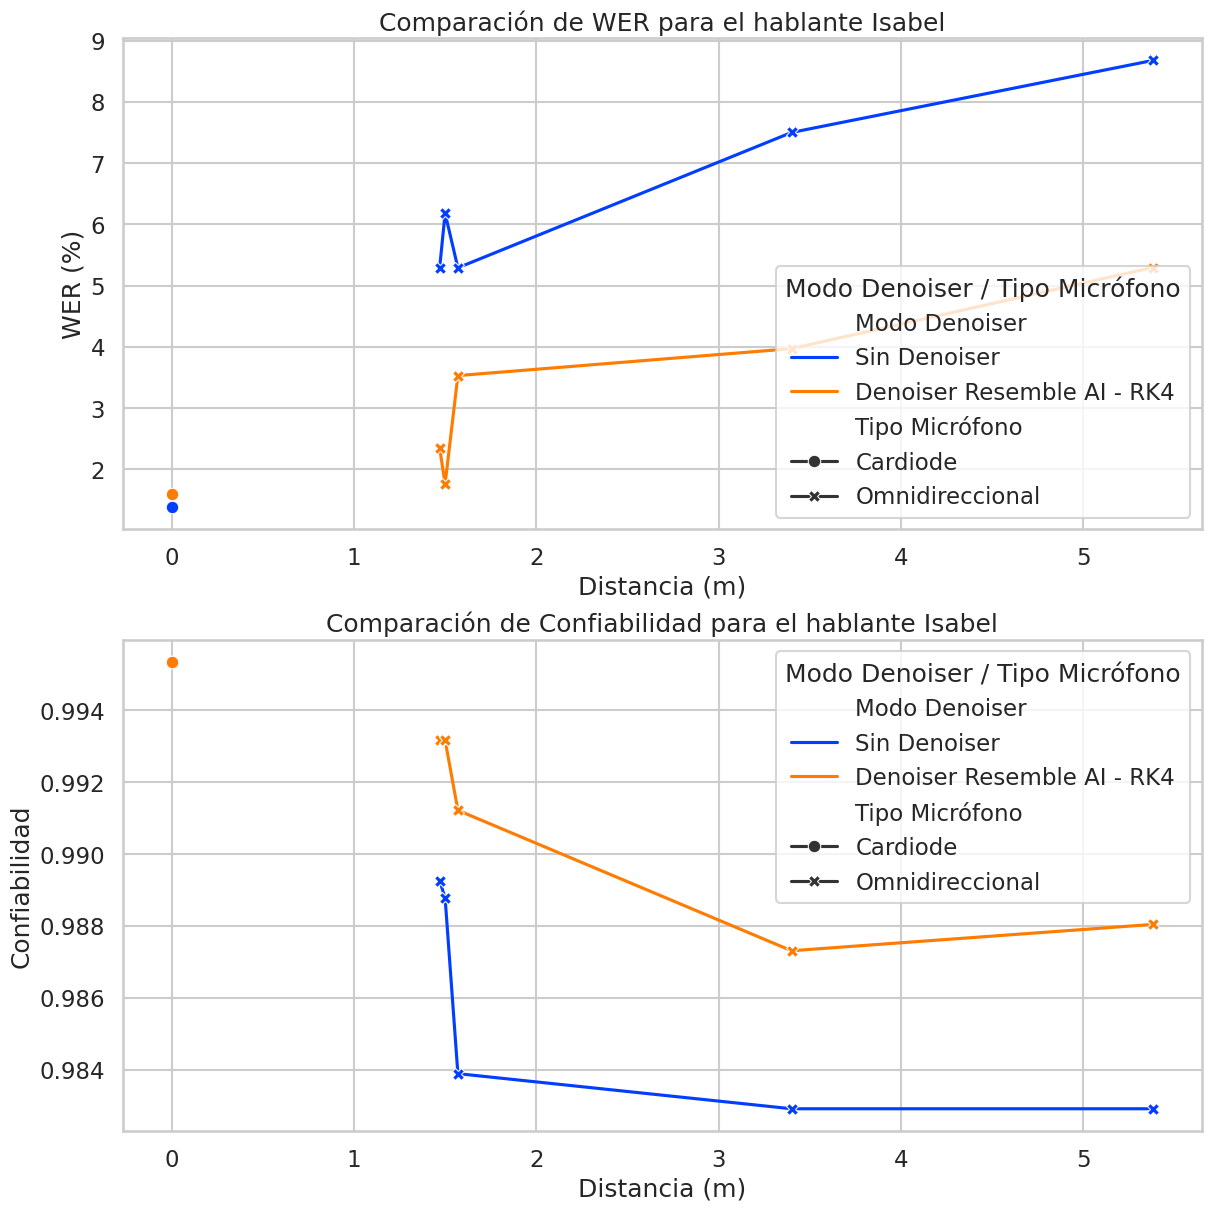

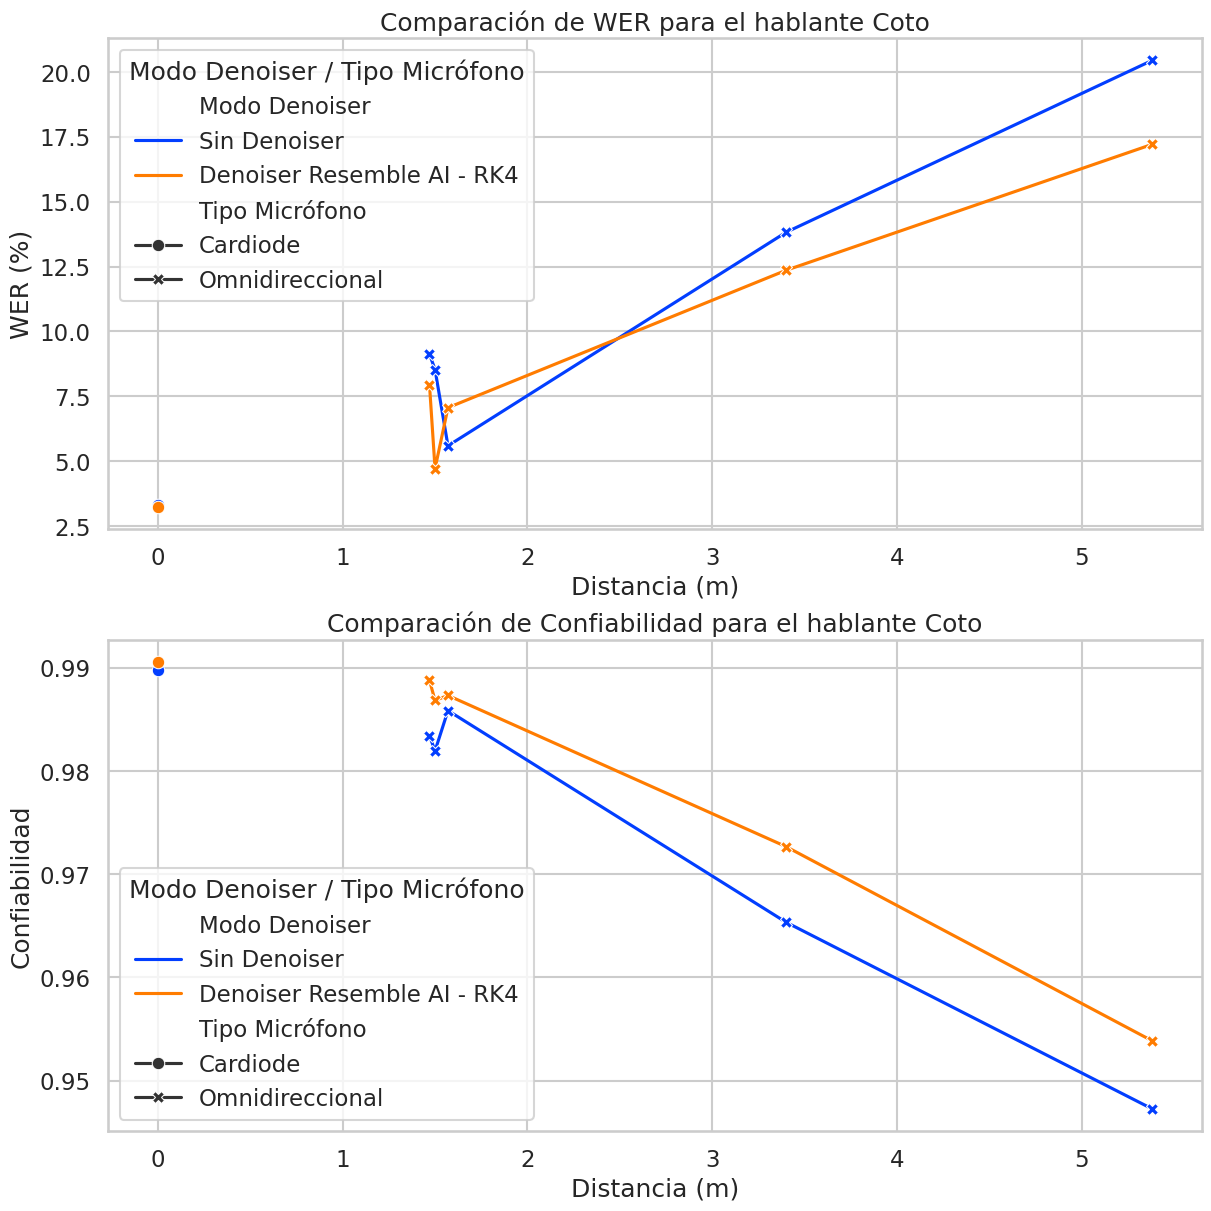

Gráficas generadas.
Calculando promedios...
Advertencia: El archivo /content/Parametros_con_denoiser_ResembleAI_RK4.csv no tiene las columnas Varianza f0 (Hz^2), Speed Rate (wpm), Frecuencia Fundamental Promedio (Hz).
Promedios generados.


In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set(style="whitegrid", context="talk", palette="bright")

# Listado de métricas a graficar
metricas = {
    'WER (%)': 'WER',
    #'Confiabilidad (Deepgram)': 'Confiabilidad'
}

# Lista de archivos con sus etiquetas correspondientes
archivos = {
    '/content/Parametros_sin_denoiser.csv': 'Sin Denoiser',
    '/content/Parametros_con_denoiser_ResembleAI_RK4.csv': 'Denoiser Resemble AI - RK4'
}

# Cargar y combinar los datos
def cargar_datos_combinados():
    dataframes = []
    for archivo, etiqueta in archivos.items():
        df = pd.read_csv(archivo)
        df['Modo Denoiser'] = etiqueta  # Añadir columna de identificación
        dataframes.append(df)
    datos_combinados = pd.concat(dataframes, ignore_index=True)
    return datos_combinados

# Función para generar gráficos comparativos en una sola imagen para cada hablante
def graficar_comparacion_por_hablante(datos_combinados, metric, nombre_metric, directorio_pdf, directorio_png):
    for hablante in datos_combinados['Hablante'].unique():
        datos_hablante = datos_combinados[datos_combinados['Hablante'] == hablante]

        # Crear una figura con dos subgráficas (ax1 y ax2)
        fig, axs = plt.subplots(2, 1, layout='constrained', figsize=(12, 12))

        # WER en la parte superior (primer subgráfico)
        sns.lineplot(
            data=datos_hablante, x='Distancia (m)', y='WER (%)', hue='Modo Denoiser',
            style='Tipo Micrófono', markers=True, dashes=False, errorbar=None, ax=axs[0]
        )
        axs[0].set_title(f"Comparación de WER para el hablante {hablante}")
        axs[0].set_xlabel("Distancia (m)")
        axs[0].set_ylabel('WER (%)')
        axs[0].legend(title="Modo Denoiser / Tipo Micrófono")
        axs[0].grid(True)

        # Confiabilidad en la parte inferior (segundo subgráfico)
        sns.lineplot(
            data=datos_hablante, x='Distancia (m)', y='Confiabilidad (Deepgram)', hue='Modo Denoiser',
            style='Tipo Micrófono', markers=True, dashes=False, errorbar=None, ax=axs[1]
        )
        axs[1].set_title(f"Comparación de Confiabilidad para el hablante {hablante}")
        axs[1].set_xlabel("Distancia (m)")
        axs[1].set_ylabel('Confiabilidad')
        axs[1].legend(title="Modo Denoiser / Tipo Micrófono")
        axs[1].grid(True)

        # Guardar la gráfica en PDF y PNG
        nombre_archivo = f"comparacion_{hablante}_"
        plt.savefig(f"{directorio_pdf}/{nombre_archivo}.pdf", format="pdf")
        plt.savefig(f"{directorio_png}/{nombre_archivo}.png", format="png")

        plt.show()

# Función principal para generar gráficos y calcular promedios
def generar_graficas():
    print("Generando gráficas...")

    # Cargar todos los datos
    datos_combinados = cargar_datos_combinados()

    datos_combinados['Tipo Micrófono'] = datos_combinados['Posición de Grabación'].apply(lambda x: 'Omnidireccional' if x == 7 else 'Cardiode')

    # Directorios para los gráficos
    directorio_pdf = "/content/Resultados_Graficas/Comparacion_Denoisers/PDFs"
    directorio_png = "/content/Resultados_Graficas/Comparacion_Denoisers/PNGs"
    os.makedirs(directorio_pdf, exist_ok=True)
    os.makedirs(directorio_png, exist_ok=True)

    # Generar gráficos comparativos para cada métrica y hablante
    for metric, nombre_metric in metricas.items():
        graficar_comparacion_por_hablante(datos_combinados, metric, nombre_metric, directorio_pdf, directorio_png)

    print("Gráficas generadas.")


# Función para calcular y guardar los promedios en un archivo de texto
def calcular_promedios(archivo_csv, archivo_salida):
    try:
        # Cargar los datos del archivo CSV
        datos = pd.read_csv(archivo_csv)

        # Lista de columnas numéricas requeridas
        columnas_requeridas = ['Speed Rate (wpm)', 'WER (%)', 'Confiabilidad (Deepgram)',
                               'Frecuencia Fundamental Promedio (Hz)', 'Varianza f0 (Hz^2)']

        # Determinar qué columnas están disponibles
        columnas_disponibles = [col for col in columnas_requeridas if col in datos.columns]
        columnas_faltantes = set(columnas_requeridas) - set(columnas_disponibles)

        if not columnas_disponibles:
            print(f"El archivo {archivo_csv} no contiene ninguna de las columnas requeridas. Se omite.")
            return

        if columnas_faltantes:
            print(f"Advertencia: El archivo {archivo_csv} no tiene las columnas {', '.join(columnas_faltantes)}.")

        # Filtrar datos según micrófono y posición
        with open(archivo_salida, 'w') as f:
            for posicion, microfono in [(7, "omnidireccional"), (None, "cardioide")]:
                if posicion is not None:
                    datos_filtrados = datos[datos['Posición de Grabación'] == posicion]
                    descripcion_posicion = "Posición de Grabación = 7"
                else:
                    datos_filtrados = datos[datos['Posición de Grabación'] != 7]
                    descripcion_posicion = "Posición de Grabación != 7"

                f.write(f"{descripcion_posicion} (Micrófono {microfono}):\n")

                for hablante in datos_filtrados['Hablante'].unique():
                    datos_hablante = datos_filtrados[datos_filtrados['Hablante'] == hablante]
                    promedios = datos_hablante[columnas_disponibles].mean()

                    f.write(f"  Hablante: {hablante}\n")
                    for columna, promedio in promedios.items():
                        f.write(f"    {columna}: {promedio:.2f}\n")
                    f.write("\n")

    except Exception as e:
        print(f"Error procesando {archivo_csv}: {e}")


# Función para calcular los promedios
def calcula_promedios():
    print("Calculando promedios...")

    # Procesar cada archivo y guardar en archivos de texto de promedios
    for archivo, etiqueta in archivos.items():
        salida_promedios = f"/content/promedios_{etiqueta.replace(' ', '_').lower()}.txt"
        calcular_promedios(archivo, salida_promedios)

    print("Promedios generados.")

# Función principal
def main():
    try:
        generar_graficas()
        calcula_promedios()


    except Exception as e:
        print(f"Ocurrió un error: {e}")

if __name__ == "__main__":
    main()


* Este código genera las gráficas tanto en formato png como pdf de las frecuencias fundamentales y velocidades del habla para cada hablante.
* Se puede ejecutar con el comando: `!python /content/generador_graficas_2.py`o bien ejecutando la siguiente celda.
* Para funcionar requiere el archivo /content/promedios\_sin\_denoiser.txt generado por el generador\_graficas\_y\_promedios.py.

Estructura de los datos procesados:
{'Omnidireccional': {'Coto': {'Speed Rate': 156.34, 'Frecuencia Fundamental': 118.37}, 'Isabel': {'Speed Rate': 89.96, 'Frecuencia Fundamental': 265.81}}, 'Cardioide': {}}


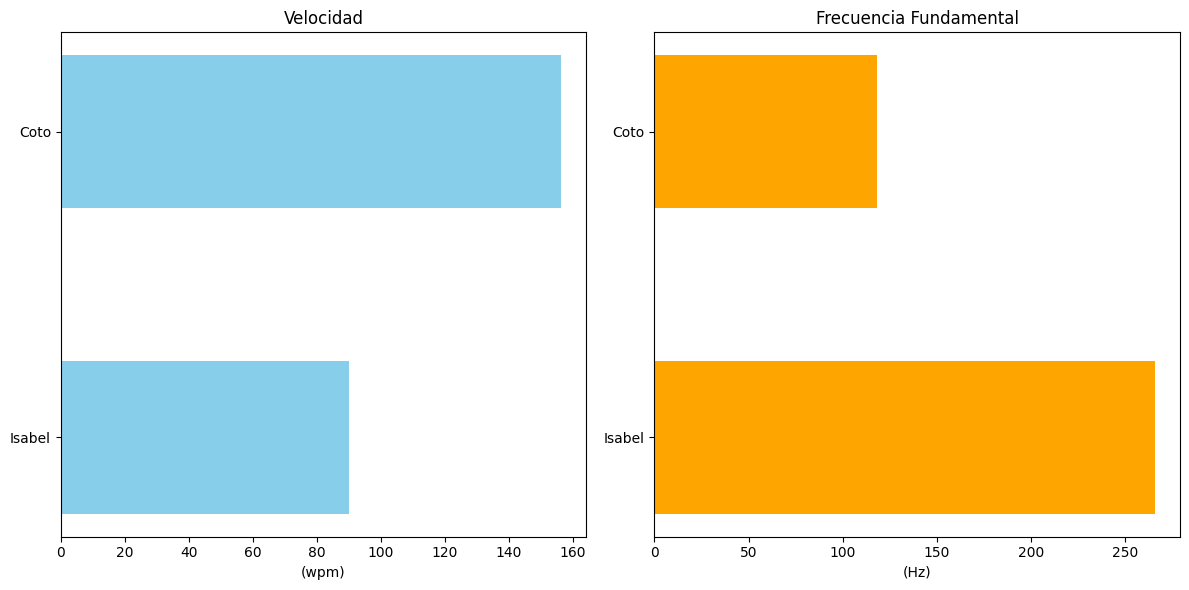

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Función para leer y procesar el archivo
def procesar_archivo(archivo):
    metricas = {
        'Omnidireccional': {},
        'Cardioide': {}
    }
    current_position = None
    current_hablante = None

    with open(archivo, 'r') as f:
        for line in f:
            line = line.strip()

            if line.startswith("Posición de Grabación ="):
                if "Micrófono omnidireccional" in line:
                    current_position = 'Omnidireccional'
                elif "Micrófono cardioide" in line:
                    current_position = 'Cardioide'

            elif line.startswith("Hablante:"):
                current_hablante = line.split(":")[1].strip()

            elif line.startswith("Speed Rate (wpm):"):
                speed = line.split(":")[1].strip()
                speed = float(speed) if speed != 'nan' else np.nan

            elif line.startswith("Frecuencia Fundamental Promedio (Hz):"):
                freq = line.split(":")[1].strip()
                freq = float(freq) if freq != 'nan' else np.nan

                if current_position and current_hablante:
                    if current_hablante not in metricas[current_position]:
                        metricas[current_position][current_hablante] = {}
                    metricas[current_position][current_hablante]['Speed Rate'] = speed
                    metricas[current_position][current_hablante]['Frecuencia Fundamental'] = freq

    return metricas

# Procesar el archivo
metricas_sin_denoiser = procesar_archivo('/content/promedios_sin_denoiser.txt')

# Verificar la estructura del diccionario
print("Estructura de los datos procesados:")
print(metricas_sin_denoiser)

# Función para graficar los datos
def graficar_todo_en_una(metricas_sin_denoiser):
    # Obtener los hablantes de las posiciones con datos
    hablantes = []
    for posicion in metricas_sin_denoiser.values():
        hablantes.extend(posicion.keys())

    hablantes = list(set(hablantes))  # Eliminar duplicados

    ancho_barras = 0.5
    x = np.arange(len(hablantes))

    # Calcular datos para Speed Rate y Frecuencia Fundamental
    speed_sin_denoiser = [
        np.nanmean([metricas_sin_denoiser[posicion][h].get('Speed Rate', 0) or 0 for posicion in metricas_sin_denoiser.keys() if h in metricas_sin_denoiser[posicion]])
        for h in hablantes
    ]
    freq_sin_denoiser = [
        np.nanmean([metricas_sin_denoiser[posicion][h].get('Frecuencia Fundamental', 0) or 0 for posicion in metricas_sin_denoiser.keys() if h in metricas_sin_denoiser[posicion]])
        for h in hablantes
    ]

    # Crear figura y ejes (ahora horizontales)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Gráfica 1: Velocidad
    axes[0].barh(x, speed_sin_denoiser, ancho_barras, color='skyblue')
    axes[0].set_title("Velocidad")
    axes[0].set_xlabel("(wpm)")
    axes[0].set_yticks(x)
    axes[0].set_yticklabels(hablantes)

    # Gráfica 2: Frecuencia
    axes[1].barh(x, freq_sin_denoiser, ancho_barras, color='orange')
    axes[1].set_title("Frecuencia Fundamental")
    axes[1].set_xlabel("(Hz)")
    axes[1].set_yticks(x)
    axes[1].set_yticklabels(hablantes)

    # Ajustar diseño
    plt.tight_layout()

    # Directorios para los gráficos
    directorio_pdf = "/content/Resultados_Graficas/Frecuencia_y_Velocidad/PDFs"
    directorio_png = "/content/Resultados_Graficas/Frecuencia_y_Velocidad/PNGs"
    os.makedirs(directorio_pdf, exist_ok=True)
    os.makedirs(directorio_png, exist_ok=True)

    # Guardar la gráfica en PDF y PNG
    nombre_archivo = f"f0_y_sr"
    plt.savefig(f"{directorio_pdf}/{nombre_archivo}.pdf", format="pdf")
    plt.savefig(f"{directorio_png}/{nombre_archivo}.png", format="png")

    plt.show()



# Llamada a la función para generar las gráficas
graficar_todo_en_una(metricas_sin_denoiser)


# Paso 9: Corroborar que todas las grabaciones tengan la misma duración

Para poder entrenar el modelo de Facebook con los datos creados a partir de las grabaciones experimentales, se debe asegurar que la duración entre las grabaciones de cerca y su pareja de lejos son de la misma duración.

In [7]:
import os
import re
from pydub import AudioSegment
from pydub.silence import detect_silence

# Función para emparejar archivos cercanos y lejanos considerando también los puntos y hablantes
def emparejar_archivos(files):

    # Filtrar grabaciones cerca y lejos
    archivos_cercanos = []
    archivos_lejanos = []

    # Expresión regular para capturar el nombre base, punto y hablante
    for file in files:
        match = re.search(r"(Grabacion\d+_Punto(\d+)_TomadaEnPunto(\d+))_(\w+)(?:_amplificado)?\.mp3", file)
        if match:
            base_name = match.group(1)   # Nombre base, como "Grabacion1_Punto1_TomadaEnPunto1"
            punto = match.group(2)       # Punto grabado (1, 2, etc.)
            tomada = match.group(3)      # Tomada en punto (1, 7, etc.)
            hablante = match.group(4)    # Hablante (Coto, Isabel, etc.)

            # Eliminar el sufijo "_amplificado" del hablante si existe
            hablante = hablante.replace("_amplificado", "")

            # Identificar si es de cerca o de lejos
            if punto == tomada:
                archivos_cercanos.append(file)
            elif tomada == "7":  # Tomada 7 es de lejos
                archivos_lejanos.append(file)

    emparejados = []

    # Creamos un diccionario para los archivos cercanos, donde la clave es el "Punto" y el nombre de la grabación
    cercanos_dict = {}
    for archivo in archivos_cercanos:
        # Extraemos el "Punto" de la grabación, por ejemplo "Punto1"
        punto = archivo.split('_')[1]  # Esto extrae "Punto1" de "Grabacion1_Punto1_TomadaEnPunto1"
        hablante = obtener_hablante(archivo)
        cercanos_dict[(punto, hablante)] = archivo

    # Emparejamos con los archivos lejanos
    for archivo in archivos_lejanos:
        # Extraemos el "Punto" de la grabación, por ejemplo "Punto1"
        punto = archivo.split('_')[1]  # Esto extrae "Punto1" de "Grabacion1_Punto1_TomadaEnPunto7"
        hablante = obtener_hablante(archivo)
        if (punto, hablante) in cercanos_dict:
            cercano = cercanos_dict[(punto, hablante)]
            emparejados.append((cercano, archivo, hablante))

    # Actualizar los nombres en la lista emparejados
    for i, (cercano, lejano, hablante) in enumerate(emparejados):
        # Generar los nuevos nombres
        nuevo_cercano = source_dir + "/" + cercano
        nuevo_lejano = source_dir + "/" + lejano

        # Reemplazar en la posición correspondiente en emparejados
        emparejados[i] = (nuevo_cercano, nuevo_lejano, hablante)

    return emparejados

# Función para extraer el hablante de los nombres de archivo
def obtener_hablante(archivo):
    # El hablante está en la última parte del nombre, antes de "amplificado" o "_"
    if "amplificado" in archivo:
        return archivo.split('_')[-2]
    else:
        return archivo.split('_')[-1].replace('.mp3', '')

def eliminar_silencio_final_para_igualar_duracion(audio1_path, audio2_path, output_dir):
    """
    Recorta el silencio al final de los audios y los iguala a la misma duración,
    recortando el archivo más largo para que coincida con la duración del más corto.

    Args:
        audio1_path (str): Ruta del primer archivo de audio.
        audio2_path (str): Ruta del segundo archivo de audio.
        output_dir (str): Directorio donde guardar los archivos ajustados.

    Returns:
        None
    """
    # Cargar los archivos de audio
    audio1 = AudioSegment.from_file(audio1_path)
    audio2 = AudioSegment.from_file(audio2_path)

    # Obtener las duraciones de los audios
    duracion_audio1 = len(audio1)  # en milisegundos
    duracion_audio2 = len(audio2)  # en milisegundos

    # Determinar cuál es el archivo más largo y cuál es el más corto
    duracion_minima = min(duracion_audio1, duracion_audio2)

    # Recortar los audios para que ambos tengan la misma duración
    if duracion_audio1 > duracion_minima:
        audio1 = audio1[:duracion_minima]  # Recorta audio1 para que tenga la misma duración que el más corto
    if duracion_audio2 > duracion_minima:
        audio2 = audio2[:duracion_minima]  # Recorta audio2 para que tenga la misma duración que el más corto

    # Asegurar que el directorio de salida exista
    os.makedirs(output_dir, exist_ok=True)

    # Guardar los audios recortados
    audio1.export(os.path.join(output_dir, os.path.basename(audio1_path)), format="mp3")
    audio2.export(os.path.join(output_dir, os.path.basename(audio2_path)), format="mp3")

    # Calcular la diferencia final de duraciones
    diferencia_final = abs(len(audio1) - len(audio2))

    print(f"Diferencia entre la duración de '{os.path.join(output_dir, os.path.basename(audio2_path))}' y '{os.path.join(output_dir, os.path.basename(audio1_path))}' es: {diferencia_final} ms")

    # Imprimir los resultados
    print(f"Audio 1 recortado guardado en: {os.path.join(output_dir, os.path.basename(audio1_path))}")
    print(f"Audio 2 recortado guardado en: {os.path.join(output_dir, os.path.basename(audio2_path))}")

# Ejemplo de cómo procesar parejas
def procesar_parejas(parejas, archivo_salida):
    """
    Procesa una lista de parejas de audios y genera un archivo de salida con las diferencias de duraciones.
    """
    for pareja in parejas:
        audio1, audio2, _ = pareja  # Desestructurar la tupla, ignorando el tercer valor
        eliminar_silencio_final_para_igualar_duracion(audio1, audio2, archivo_salida)

source_dir = "/content/Grabaciones_pre_denoiser"
out_dir = "/content/Grabaciones_Recortadas"

# Obtener todos los archivos en la carpeta de origen
files = os.listdir(source_dir)

# Llamamos a la función para emparejar los archivos
emparejados = emparejar_archivos(files)

# Ejecutar el procesamiento
procesar_parejas(emparejados, out_dir)

print("\nProcesamiento completado.")


Diferencia entre la duración de '/content/Grabaciones_Recortadas/Grabacion1_Punto6_TomadaEnPunto7_Coto_amplificado.mp3' y '/content/Grabaciones_Recortadas/Grabacion1_Punto6_TomadaEnPunto6_Coto.mp3' es: 0 ms
Audio 1 recortado guardado en: /content/Grabaciones_Recortadas/Grabacion1_Punto6_TomadaEnPunto6_Coto.mp3
Audio 2 recortado guardado en: /content/Grabaciones_Recortadas/Grabacion1_Punto6_TomadaEnPunto7_Coto_amplificado.mp3
Diferencia entre la duración de '/content/Grabaciones_Recortadas/Grabacion1_Punto1_TomadaEnPunto7_Isabel_amplificado.mp3' y '/content/Grabaciones_Recortadas/Grabacion1_Punto1_TomadaEnPunto1_Isabel.mp3' es: 0 ms
Audio 1 recortado guardado en: /content/Grabaciones_Recortadas/Grabacion1_Punto1_TomadaEnPunto1_Isabel.mp3
Audio 2 recortado guardado en: /content/Grabaciones_Recortadas/Grabacion1_Punto1_TomadaEnPunto7_Isabel_amplificado.mp3
Diferencia entre la duración de '/content/Grabaciones_Recortadas/Grabacion1_Punto3_TomadaEnPunto7_Coto_amplificado.mp3' y '/content/Gr

# Paso 10: Organizar grabaciones para entrenar denoiser

El siguiente código se organiza los archivos de audio en distintas carpetas de manera que facilite la generación de los .json necesarios para entrenar el modelo de denoiser de Facebook

In [8]:
import os
import shutil
import re

# Directorios
source_dir = "/content/Grabaciones_Recortadas"
destination_train_dir = "/content/Grabaciones_entrenamiento_D_FB"
destination_valid_clean_dir = "/content/Validation/clean"  # Solo los Punto5 van aquí
destination_valid_noisy_dir = "/content/Validation/noisy"  # Solo los Punto5 van aquí
destination_test_clean_dir = "/content/Test/clean"  # Solo los Punto6 van aquí
destination_test_noisy_dir = "/content/Test/noisy"  # Solo los Punto6 van aquí
destination_noisy_dir = "/content/Grabaciones_entrenamiento_D_FB/noisy"
destination_clean_dir = "/content/Grabaciones_entrenamiento_D_FB/clean"

# Crear las carpetas destino si no existen
os.makedirs(destination_train_dir, exist_ok=True)
os.makedirs(destination_valid_clean_dir, exist_ok=True)
os.makedirs(destination_valid_noisy_dir, exist_ok=True)
os.makedirs(destination_test_clean_dir, exist_ok=True)
os.makedirs(destination_test_noisy_dir, exist_ok=True)
os.makedirs(destination_noisy_dir, exist_ok=True)
os.makedirs(destination_clean_dir, exist_ok=True)

# Obtener todos los archivos en la carpeta de origen
files = os.listdir(source_dir)

# Filtrar grabaciones cerca y lejos
close_files = []
far_files = []
validation_close_files = []
validation_far_files = []
test_close_files = []
test_far_files = []

# Expresión regular para capturar el nombre base, punto y hablante
for file in files:
    match = re.search(r"(Grabacion\d+_Punto(\d+)_TomadaEnPunto(\d+))_(\w+)(?:_amplificado)?\.mp3", file)
    if match:
        base_name = match.group(1)   # Nombre base, como "Grabacion1_Punto1_TomadaEnPunto1"
        punto = match.group(2)       # Punto grabado (1, 2, etc.)
        tomada = match.group(3)      # Tomada en punto (1, 7, etc.)
        hablante = match.group(4)    # Hablante (Coto, Isabel, etc.)

        # Eliminar el sufijo "_amplificado" del hablante si existe
        hablante = hablante.replace("_amplificado", "")

        # Identificar si es de cerca o de lejos
        if punto == tomada and punto not in ['5', '6']:
            close_files.append((file, hablante))
            destination_noisy_or_clean = destination_clean_dir
        elif tomada == "7" and punto not in ['5', '6']:  # Tomada 7 es de lejos
            far_files.append((file, hablante))
            destination_noisy_or_clean = destination_noisy_dir
        elif punto == "5" and tomada != "7":
            validation_close_files.append((file, hablante))
        elif punto == "5" and tomada == "7":
            validation_far_files.append((file, hablante))
        elif punto == "6" and tomada != "7":
            test_close_files.append((file, hablante))
        elif punto == "6" and tomada == "7":
            test_far_files.append((file, hablante))

# Organizar en pares
for close_file, close_hablante in close_files:
    # Extraer identificador base del archivo
    match_close = re.search(r"(Grabacion\d+_Punto\d+)_", close_file)
    if match_close:
        base_name = match_close.group(1)



        # Buscar el archivo correspondiente de lejos para el mismo hablante
        far_file = None
        for f, far_hablante in far_files:
            if base_name in f and close_hablante == far_hablante:  # Asegura coincidencia de base_name y hablante
                far_file = f
                break

        if far_file:
            # Crear carpeta para el par y hablante en la carpeta destino correspondiente
            pair_folder_noisy = os.path.join(destination_noisy_dir)
            os.makedirs(pair_folder_noisy, exist_ok=True)

            pair_folder_clean = os.path.join(destination_clean_dir)
            os.makedirs(pair_folder_clean, exist_ok=True)

            # Copiar los archivos al par
            punto_indicador = base_name.split('_Punto')[1]
            shutil.copy(os.path.join(source_dir, close_file), os.path.join(pair_folder_clean, f"{punto_indicador}_{close_hablante}.wav"))
            shutil.copy(os.path.join(source_dir, far_file), os.path.join(pair_folder_noisy, f"{punto_indicador}_{close_hablante}.wav"))

            print(f"Pares organizados: {base_name}_{close_hablante}")
        else:
            print(f"No se encontró archivo de lejos para {base_name}_{close_hablante}")

for validation_close_file, close_hablante in validation_close_files:

    # Extraer identificador base del archivo
    match_close = re.search(r"(Grabacion\d+_Punto\d+)_", validation_close_file)
    if match_close:
        base_name = match_close.group(1)

         # Buscar el archivo correspondiente de lejos para el mismo hablante
        validation_far_file = None
        for f, far_hablante in validation_far_files:
            if base_name in f and close_hablante == far_hablante:  # Asegura coincidencia de base_name y hablante
                validation_far_file = f
                break

        if validation_far_file:
            # Copiar a validación y prueba según corresponda
            punto_indicador = base_name.split('_Punto')[1]
            shutil.copy(os.path.join(source_dir, close_file), os.path.join(destination_valid_clean_dir, f"{punto_indicador}_{close_hablante}.wav"))
            shutil.copy(os.path.join(source_dir, far_file), os.path.join(destination_valid_noisy_dir, f"{punto_indicador}_{close_hablante}.wav"))

            print(f"Pares organizados: {base_name}_{close_hablante}")
        else:
            print(f"No se encontró archivo de lejos para {base_name}_{close_hablante}")

for test_close_file, close_hablante in test_close_files:

    # Extraer identificador base del archivo
    match_close = re.search(r"(Grabacion\d+_Punto\d+)_", test_close_file)
    if match_close:
        base_name = match_close.group(1)

         # Buscar el archivo correspondiente de lejos para el mismo hablante
        test_far_file = None
        for f, far_hablante in test_far_files:
            if base_name in f and close_hablante == far_hablante:  # Asegura coincidencia de base_name y hablante
                test_far_file = f
                break

        if test_far_file:
            # Copiar a validación y prueba según corresponda
            shutil.copy(os.path.join(source_dir, close_file), os.path.join(destination_test_clean_dir, f"{punto_indicador}_{close_hablante}.wav"))
            shutil.copy(os.path.join(source_dir, far_file), os.path.join(destination_test_noisy_dir, f"{punto_indicador}_{close_hablante}.wav"))

            print(f"Pares organizados: {base_name}_{close_hablante}")
        else:
            print(f"No se encontró archivo de lejos para {base_name}_{close_hablante}")

# Mostrar resumen
print("Organización completa.")


Pares organizados: Grabacion1_Punto3_Coto
Pares organizados: Grabacion1_Punto1_Isabel
Pares organizados: Grabacion1_Punto1_Coto
Pares organizados: Grabacion1_Punto4_Isabel
Pares organizados: Grabacion1_Punto2_Isabel
Pares organizados: Grabacion1_Punto8_Isabel
Pares organizados: Grabacion1_Punto2_Coto
Pares organizados: Grabacion1_Punto3_Isabel
Pares organizados: Grabacion1_Punto8_Coto
Pares organizados: Grabacion1_Punto4_Coto
Pares organizados: Grabacion1_Punto5_Coto
Pares organizados: Grabacion1_Punto5_Isabel
Pares organizados: Grabacion1_Punto6_Coto
Pares organizados: Grabacion1_Punto6_Isabel
Organización completa.


# Paso 11: Clonar repositorio e instalar librerías para denoiser de Facebook



In [9]:
# Eliminar la carpeta anterior si existía para evitar conflictos
!rm -rf denoiser

# Clonar el repositorio oficial
!git clone https://github.com/facebookresearch/denoiser.git

# Moverse al directorio y realizar la instalación
%cd denoiser
!pip install .
!pip install pesq

Cloning into 'denoiser'...
remote: Enumerating objects: 440, done.
remote: Total 440 (delta 0), reused 0 (delta 0), pack-reused 440 (from 1)
Receiving objects: 100% (440/440), 74.33 MiB | 12.12 MiB/s, done.
Resolving deltas: 100% (195/195), done.
/content/denoiser
Processing /content/denoiser
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 4.2 MB/s eta 0:00:00
  Created wheel for denoiser: filename=denoiser-0.1.5-py3-none-any.whl size=43936 sha256=cbc7dab3e2e1a4bbf7ff87e58639b735cab5d9e8a4ac0ee870fd5a3939a3b432
  Stored in directory: /tmp/pip-ephem-wheel-cache-234qybwe/wheels/30/74/08/8e4c9ec2e7b0c412146ea9a060c98f9050928cede32fdcc987
  Created wheel for julius: filename=julius-0.2.7-py3-none-any.whl size=21869 sha256=9ca271ebc4ead09acd6ad3251ec309e0bcd9e98af95255d26303d8abbc51e724
  Stored in directory: /root/.cache/

#  Paso 12: Generación de los datasets para el entrenamiento, validación y pruebas

In [ ]:
out = "egs/mydataset/train"
!mkdir -p $out

In [ ]:
!python -m denoiser.audio /content/Grabaciones_entrenamiento_D_FB/clean/ > $out/clean.json
!python -m denoiser.audio /content/Grabaciones_entrenamiento_D_FB/noisy/ > $out/noisy.json

In [ ]:
out = "egs/mydataset/valid"
!mkdir -p $out

In [ ]:
!python -m denoiser.audio /content/Validation/clean/ > $out/clean.json
!python -m denoiser.audio /content/Validation/noisy/ > $out/noisy.json

In [ ]:
out = "egs/mydataset/test"
!mkdir -p $out

In [ ]:
!python -m denoiser.audio /content/Test/clean/ > $out/clean.json
!python -m denoiser.audio /content/Test/noisy/ > $out/noisy.json

# Paso 13: Cambiar el contenido del debug.yaml

In [10]:
# Define el contenido del archivo YAML
yaml_content = """
dset:
  train: egs/mydataset/train   # path to train folder, should contain both a noisy.json and clean.json file
  valid: egs/mydataset/valid   # path to the validation folder.
                       # If not set, the last epoch is kept rather than the best
  test: egs/mydataset/test    # Path to the test set. Metrics like STOI and PESQ are evaluated on it
                       # every `eval_every` epochs.
  noisy_json: egs/mydataset/train/noisy.json  # files to enhance. Those will be stored in the experiment
                                       # `samples` folder for easy subjective evaluation of the model.
  noisy_dir:
  matching: sort       # how to match noisy and clean files. For Valentini, use sort, for DNS, use dns.
eval_every: 2
"""

# Ruta al archivo a sobrescribir
file_path = "/content/denoiser/conf/dset/debug.yaml"

# Sobrescribe el archivo con el contenido proporcionado
with open(file_path, "w") as file:
    file.write(yaml_content)

print(f"El archivo {file_path} ha sido sobrescrito exitosamente.")


El archivo /content/denoiser/conf/dset/debug.yaml ha sido sobrescrito exitosamente.


# Paso 14: Entrenar el modelo de denoiser de Facebook con los datos experimentales

In [ ]:
!python train.py

[2024-11-24 16:40:28,363][__main__][INFO] - For logs, checkpoints and samples check /content/denoiser/outputs/exp_
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
[2024-11-24 16:40:36,679][__main__][ERROR] - Some error happened
Traceback (most recent call last):
  File "/content/denoiser/train.py", line 105, in main
    _main(args)
  File "/content/denoiser/train.py", line 99, in _main
    run(args)
  File "/content/denoiser/train.py", line 79, in run
    solver = Solver(data, model, optimizer, args)
  File "/content/denoiser/denoiser/solver.py", line 69, in __init__
    factor_mag=args